In [1]:
import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp # K-S test
import scipy

In [2]:
#Set basic graph properties
%config InlineBackend.figure_format = "retina"
font = {'size' : 16}
matplotlib.rcParams['font.family'] = ['Arial', 'sans-serif']
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
#Read read mapping data into dataframe
#df = pandas.read_csv("all.htseq-count.txt", sep=" ")
df = pandas.read_csv("all.htseq-count.downsampled.txt", sep=" ")

In [4]:
#Read IES retention scores into dataframe
df_irs = pandas.read_csv("ies_retention.tab", sep="\t")

In [5]:
ptcaf1_irs = df_irs[["ID", "PTCAF1"]]

merged_df = pandas.merge(df, ptcaf1_irs, left_on=["IES"], right_on=["ID"], how="inner")
df = merged_df.drop(columns=["ID"]).rename(columns={"PTCAF1": "PTCAF1_IRS"})

(0, 1.029, 0.0, 12668.25)

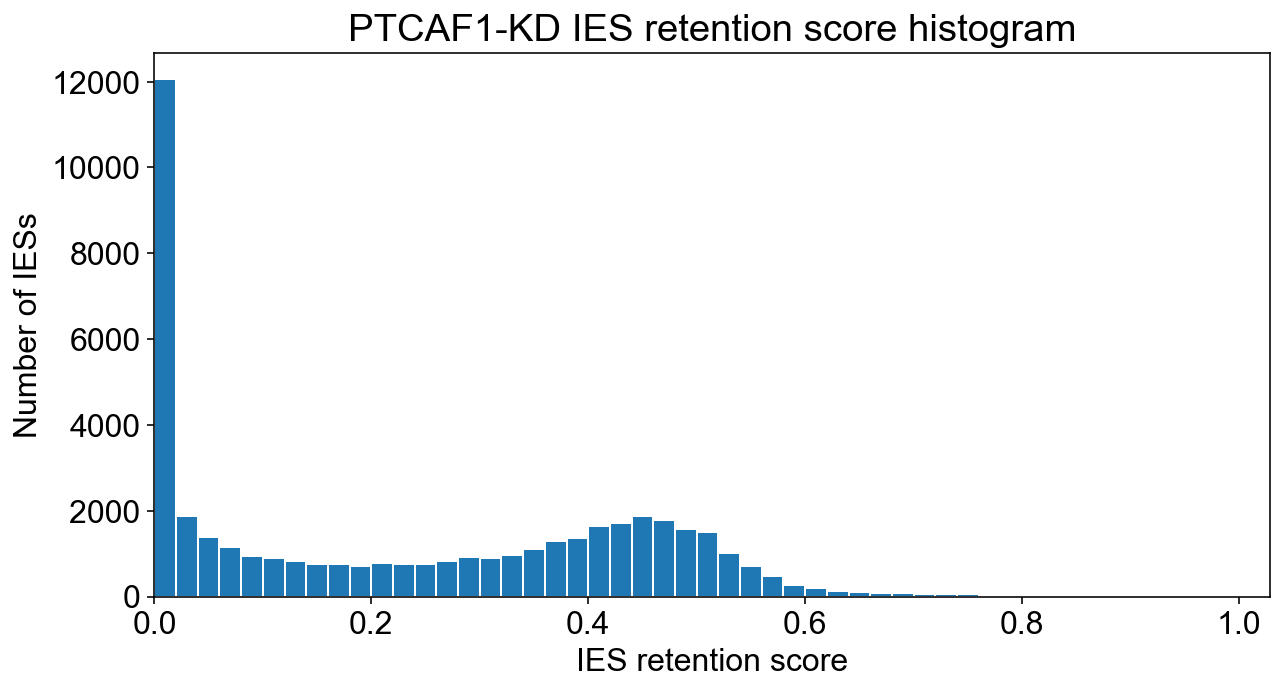

In [6]:
#Histogram of IES retention scores

plt.hist((df["PTCAF1_IRS"]), bins=np.arange(0, 1, 0.02), ec='white')
title = plt.title("PTCAF1-KD IES retention score histogram")
xl = plt.xlabel("IES retention score")
yl = plt.ylabel("Number of IESs")
plt.axis(xmin=0)

(0, 208.95, 0.0, 4233.6)

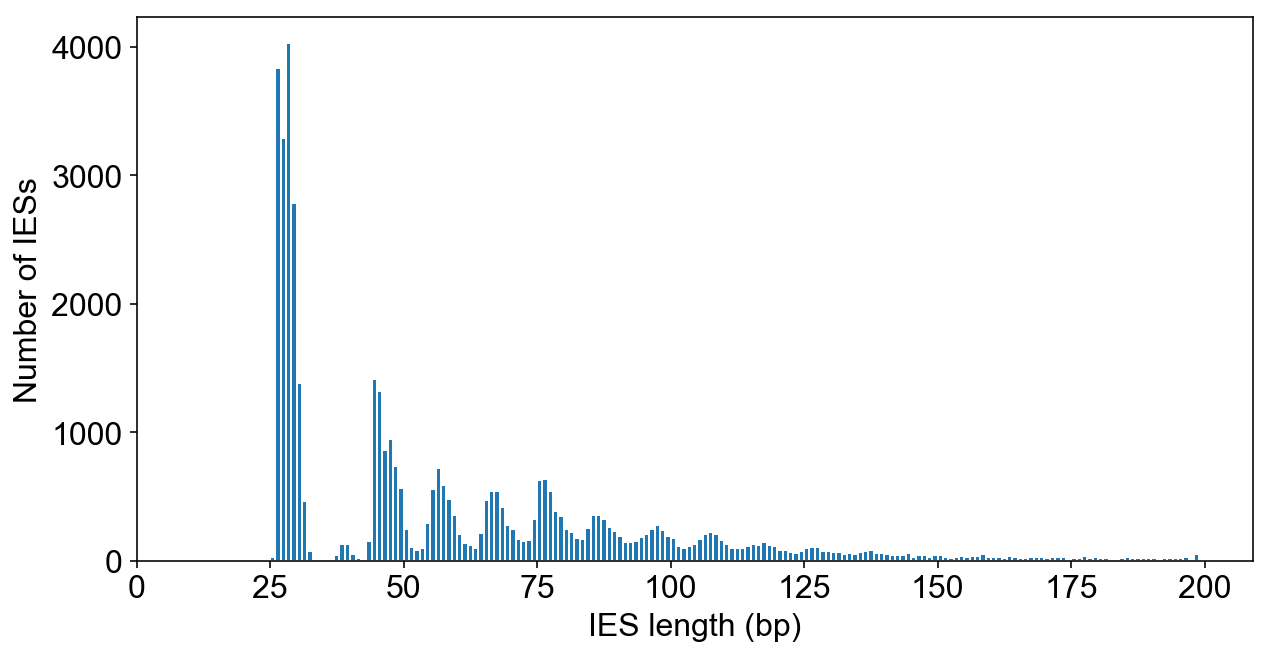

In [7]:
plt.hist((df["IES_length"]), bins=np.arange(0, 200, 1), ec='white')
#title = plt.title("PTCAF1-KD IES retention score histogram")
xl = plt.xlabel("IES length (bp)")
yl = plt.ylabel("Number of IESs")
plt.axis(xmin=0)

In [8]:
#Counts for mapped properly paired reads below
#Obtained from samtools stats command output like so:
#grep "reads properly paired"
D_e = 19274110
D_p = 19338954

N_e = 10195480
N_p = 11930456

In [9]:
#Fraction to downsample N_p by:
N_e/N_p

0.8545758854481338

In [10]:
#shorter variable names for calculations
d_e = df["EV_PGM_MP"]
n_e = df["EV_PGM_NP"]

d_p = df["PtCAF1_PGM_MP"]
n_p = df["PtCAF1_PGM_NP"]

In [11]:
D_e, D_p = sum(d_e), sum(d_p)
N_e, N_p = sum(n_e), sum(n_p)

print(D_e, D_p)
print(N_e, N_p)

918508 881645
315393 275458


In [12]:
df["r_e"] = (n_e/N_e)/(d_e/D_e)
df["r_p"] = (n_p/N_p)/(d_p/D_p)

In [13]:
#Display a few lines of the Pandas dataframe
df[:5]

,IES,IES_length,EV_PGM_MP,EV_PGM_NP,PtCAF1_PGM_MP,PtCAF1_PGM_NP,PTCAF1_IRS,r_e,r_p
0,IESPGM.PTET51.1.75.55795,66,12,3,18,3,0.3077,0.728066,0.533442
1,IESPGM.PTET51.1.67.91089,26,8,1,11,4,0.0917,0.364033,1.163873
2,IESPGM.PTET51.1.7.268537,82,25,10,24,3,0.4267,1.164906,0.400081
3,IESPGM.PTET51.1.27.424742,26,11,6,3,1,0.2692,1.588508,1.066884
4,IESPGM.PTET51.1.114.159508,67,20,2,19,1,0.0082,0.291227,0.168455


0.09351384535389767 1.7774997402516106e-169
1.0422035931084837 1.0074915656253731
44449 44432


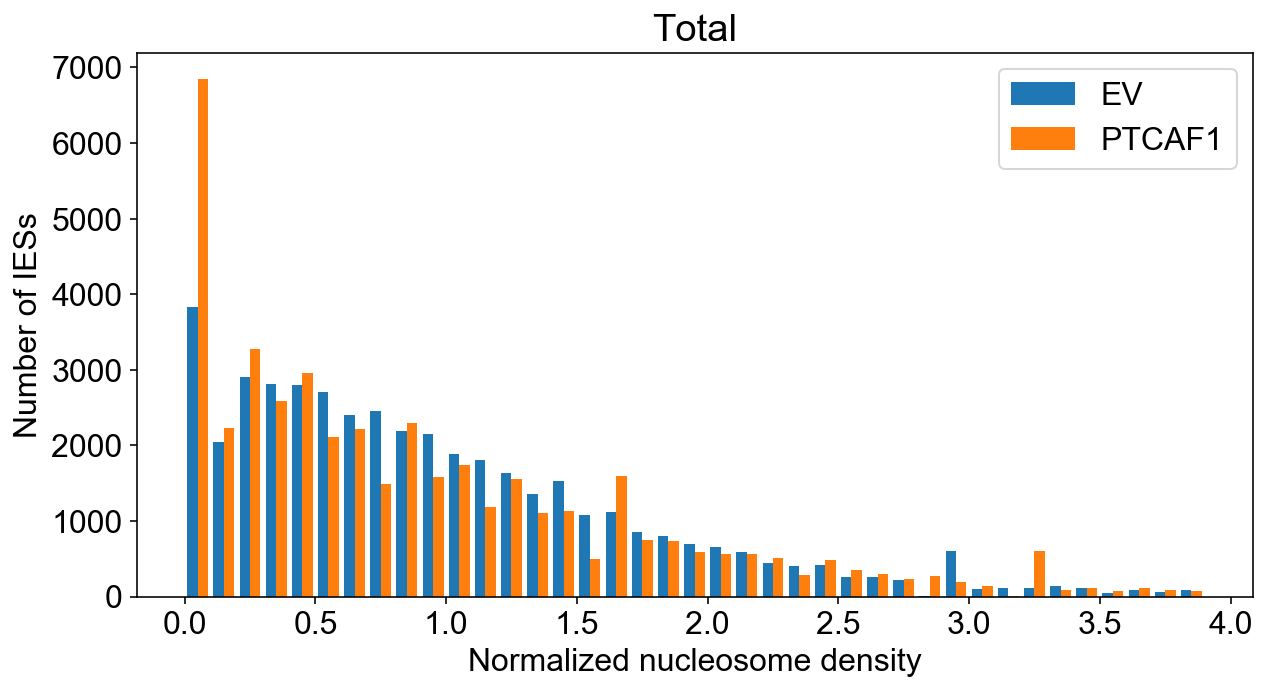

In [14]:
#Histograms of nucleosome densities
e_a = [d for d in df["r_e"] if not np.isnan(d) and not np.isinf(d)]
p_a = [d for d in df["r_p"] if not np.isnan(d) and not np.isinf(d)]

plt.hist((e_a, p_a), bins=np.arange(0, 4, 0.1), label=["EV", "PTCAF1"])
plt.title("Total")
plt.xlabel("Normalized nucleosome density")
plt.ylabel("Number of IESs")
l = plt.legend()

#K-S two sample test
ks_stat, p_val = ks_2samp(e_a, p_a)
print(ks_stat, p_val)

#Summary stats and check on number of measurements after filtering of "nan" and "inf" values resulting from division by 0
print(np.mean(e_a), np.mean(p_a))
print(len(e_a), len(p_a))

In [15]:
#Nucleosome densities for different PTCAF1-KD IRS thresholds
e_a_l = [d for d, irs in zip(df["r_e"], df["PTCAF1_IRS"]) if not np.isnan(d) and not np.isinf(d) and irs < 0.1]
p_a_l = [d for d, irs in zip(df["r_p"], df["PTCAF1_IRS"]) if not np.isnan(d) and not np.isinf(d) and irs < 0.1]
e_a_h = [d for d, irs in zip(df["r_e"], df["PTCAF1_IRS"]) if not np.isnan(d) and not np.isinf(d) and irs > 0.2]
p_a_h = [d for d, irs in zip(df["r_p"], df["PTCAF1_IRS"]) if not np.isnan(d) and not np.isinf(d) and irs > 0.2]

#selecting IESs for the first peak from 26 bp to 31 bp
e_a_l_r = [d for d, irs, il in zip(df["r_e"], df["PTCAF1_IRS"], df["IES_length"]) 
         if not np.isnan(d) and not np.isinf(d) and irs < 0.1 and il >= 26 and il <=31]
p_a_l_r = [d for d, irs, il in zip(df["r_p"], df["PTCAF1_IRS"], df["IES_length"]) 
         if not np.isnan(d) and not np.isinf(d) and irs < 0.1 and il >= 26 and il <=31]
e_a_h_r = [d for d, irs, il in zip(df["r_e"], df["PTCAF1_IRS"], df["IES_length"]) 
         if not np.isnan(d) and not np.isinf(d) and irs >= 0.1 and il >= 26 and il <=31]
p_a_h_r = [d for d, irs, il in zip(df["r_p"], df["PTCAF1_IRS"], df["IES_length"]) 
         if not np.isnan(d) and not np.isinf(d) and irs >= 0.1 and il >= 26 and il <=31]

#K-S two sample tests
l_ks = ks_2samp(e_a_l, p_a_l)
h_ks = ks_2samp(e_a_h, p_a_h)
l_r_ks = ks_2samp(e_a_l_r, p_a_l_r)
h_r_ks = ks_2samp(e_a_h_r, p_a_h_r)

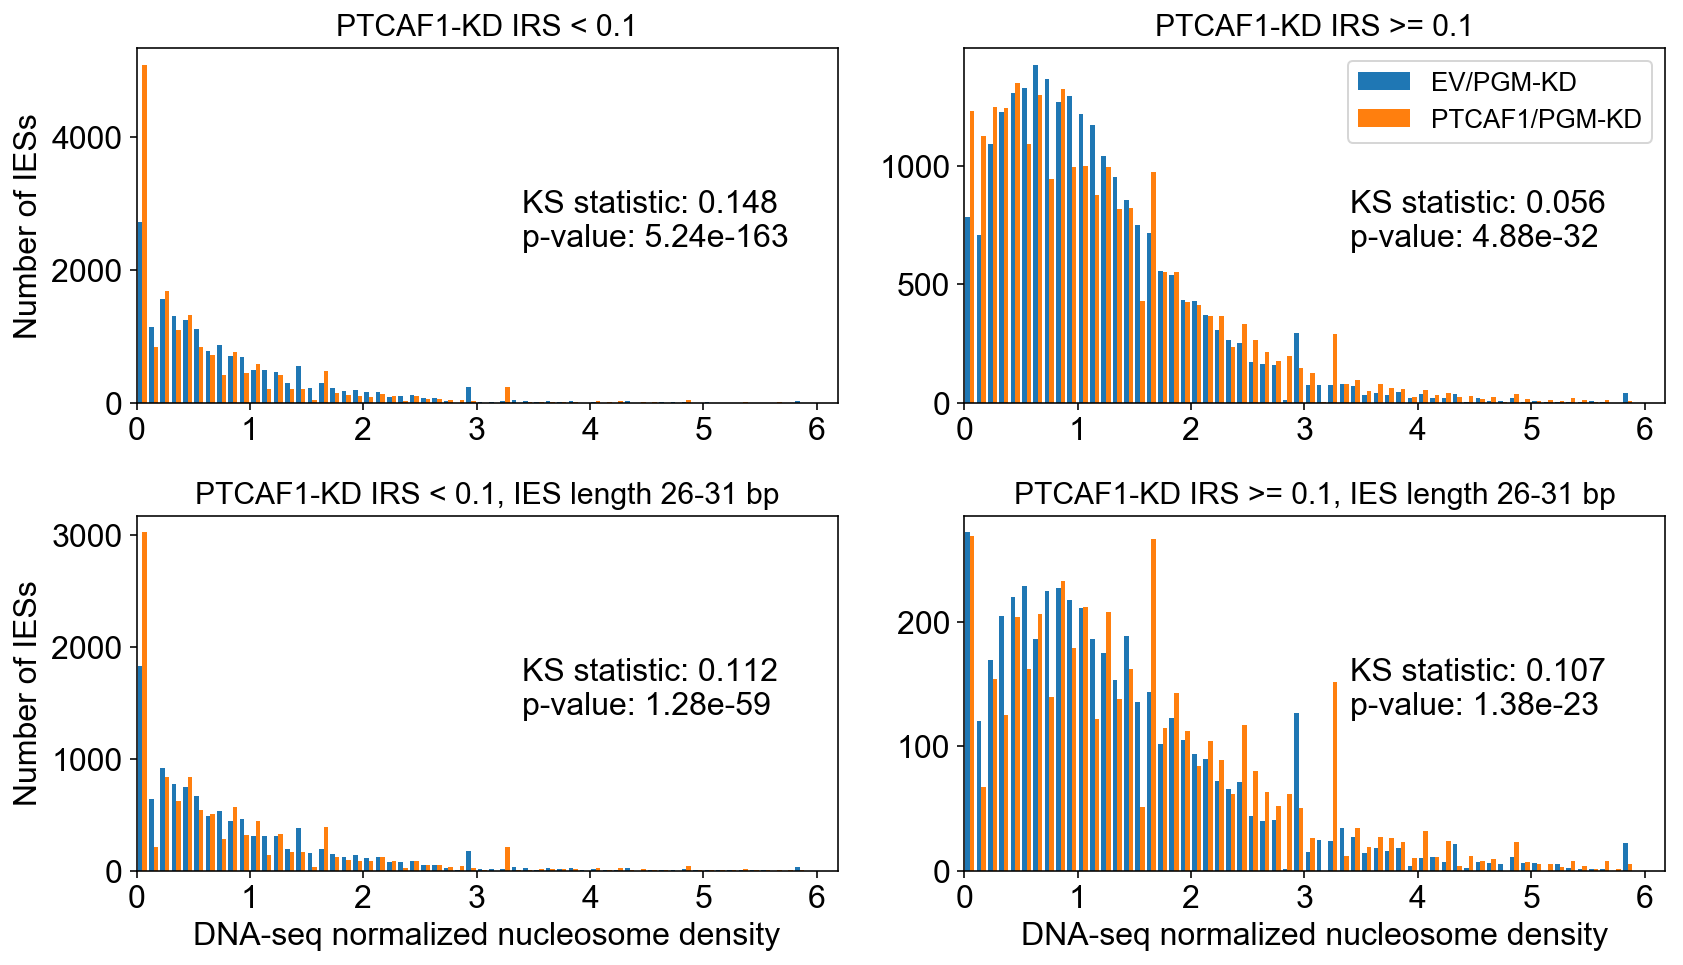

In [33]:
#Distributions of nucleosome densities according to PTCAF1-KD IRS and IES length

plt.rcParams['figure.figsize'] = [12, 7]
fig, axes = plt.subplots(2, 2)
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

h1 = ax1.hist((e_a_l, p_a_l), bins=np.arange(0, 6, 0.1), label=["EV/PGM-KD", "PTCAF1/PGM-KD"])
ax1.set_title("PTCAF1-KD IRS < 0.1", fontsize=15)
ax1.text(0.55, 0.6, 'KS statistic: %.3f\np-value: %.2e' % l_ks, transform=ax1.transAxes, verticalalignment='top')
ty1 = ax1.set(ylabel="Number of IESs")
ax1.axis(xmin=0)

h2 = ax2.hist((e_a_h, p_a_h), bins=np.arange(0, 6, 0.1), label=["EV/PGM-KD", "PTCAF1/PGM-KD"])
ax2.set_title("PTCAF1-KD IRS >= 0.1", fontsize=15)
ax2.text(0.55, 0.6, 'KS statistic: %.3f\np-value: %.2e' % h_ks, transform=ax2.transAxes, verticalalignment='top')
ax2.axis(xmin=0)

h3 = ax3.hist((e_a_l_r, p_a_l_r), bins=np.arange(0, 6, 0.1), label=["EV/PGM-KD", "PTCAF1/PGM-KD"])
ax3.set_title("PTCAF1-KD IRS < 0.1, IES length 26-31 bp", fontsize=15)
tx3 = ax3.set(xlabel="DNA-seq normalized nucleosome density")
ty3 = ax3.set(ylabel="Number of IESs")
ax3.text(0.55, 0.6, 'KS statistic: %.3f\np-value: %.2e' % l_r_ks, transform=ax3.transAxes, verticalalignment='top')
ax3.axis(xmin=0)

h4 = ax4.hist((e_a_h_r, p_a_h_r), bins=np.arange(0, 6, 0.1), label=["EV/PGM-KD", "PTCAF1/PGM-KD"])
ax4.set_title("PTCAF1-KD IRS >= 0.1, IES length 26-31 bp", fontsize=15)
tx4 = ax4.set(xlabel="DNA-seq normalized nucleosome density")
ax4.axis(xmin=0)
ax4.text(0.55, 0.6, 'KS statistic: %.3f\np-value: %.2e' % h_r_ks, transform=ax4.transAxes, verticalalignment='top')
l = ax2.legend(fontsize=13)

plt.tight_layout()
#plt.savefig("nucleosome_densities.pdf")